<font size="12">Project-4: Data Analysis & Prediction</font>

<li><font size="4">Class:DAV 5400 Analytics Programming</font>
<li><font size="4">Director:Stefanie Molin </font>
<li><font size="4">Author:Zhengnan Li </font>
<li><font size="4">Student Id: 800763534 </font>

<font size="6">1. Introduction </font>

In this project. I plan to use the dataset of chip of GPU and CPU to analyse the relationship between chip size, Process Size and frequency,etc. And analyze the attribute in different vender by different type. And after that,we can try tp predict the trand of chip's attribute. The dataset is found in heywhale and you can see it from here:

[Chip of CPU and GPU](https://www.heywhale.com/mw/dataset/64dc9b5000151985794c41a9/content)

This dataset consists of many kinds of Product in different attributes. My research will be useful for those who are interested in chip development situation. More precisely for the people who want to see summary of the currently chip and their size, performance, transistors and frequency etc. So they can know the relationship between different products and attributes, Which benefits a lot because the customer can choose the product suitable for them and the developer can figure out what they need to improve.What's more they can compare them in different vendors and choose the right product they want.

The purpose of the analysis are as followes:
<ol>
<li>  Observe the product number of different vendors.
<li>  Observe different advantages and disadvantages of each vendor and the chip development situation。
<li>  Analyze current market products and product purchase selection suggestions through the advantages, disadvantages and chip performance of each manufacturer.
<li>  Chips have many properties. Are they related and can they be predicted by models?
<li>  Assuming that predictions can be made, does the model perform well and are the prediction results credible?

<font size="6">2. Data Summary </font>

**We will use the package as follows**
<li>Pandas: Data manipulation and analysis library.
<li>Numpy: Numerical computing library.
<li>Matplotlib: Data visualization library.
<li>Seaborn: Statistical data visualization library.
<li>sklearn: Transforming input data such as text for use with machine learning algorithms

**View the chip table**

The data is searched online. First, let's initialize and view the table contents of the data.

In [1]:
# Making a initialization of class
from chip_analysis_and_prediction.data_summary import DataProcess

#Put my own path here
my_file_path = 'https://raw.githubusercontent.com/Zhengnan817/Project-3-Data-Reconstruction-and-Analysis/main/src/chip_analysis/data/chip_dataset.csv'
cpu_table = DataProcess(my_file_path)
df = cpu_table.view_data()
df.head()

,Product,Type,Release Date,Process Size,TDP,Die Size,Transistors,Freq,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/07,65,45,77.0,122,2200,AMD
1,AMD Athlon 200GE,CPU,9/6/18,14,35,192.0,4800,3200,AMD
2,Intel Xeon E5-2603 v2,CPU,9/1/13,22,80,160.0,1400,1800,Intel
3,AMD Phenom II X4 980 BE,CPU,5/3/11,45,125,258.0,758,3700,AMD
4,Intel Xeon E5-2470 v2,CPU,9/1/13,22,95,160.0,1400,2400,Intel


**Check the type**

Let’s take a look at the type of each column in the data

In [2]:
column_types = df.dtypes
print(column_types)

Product          object
Type             object
Release Date     object
Process Size      int64
TDP               int64
Die Size        float64
Transistors       int64
Freq              int64
Vendor           object
dtype: object


Are you worried that there will be null or missing values in our data? Actually no. In the current and EDA parts, we only visualize and display the data and do not involve calculations, so even if there are null values, it will not affect our results. But as can be seen from the dataframe above, there is a problem with the format of time, so we transform this column.

In [3]:
cpu_table.data_clean()

,Product,Type,Release Date,Process Size,TDP,Die Size,Transistors,Freq,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65,45,77.0,122,2200,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14,35,192.0,4800,3200,AMD
2,Intel Xeon E5-2603 v2,CPU,2013-09-01,22,80,160.0,1400,1800,Intel
3,AMD Phenom II X4 980 BE,CPU,2011-05-03,45,125,258.0,758,3700,AMD
4,Intel Xeon E5-2470 v2,CPU,2013-09-01,22,95,160.0,1400,2400,Intel
...,...,...,...,...,...,...,...,...,...
3494,ATI FirePro V7800,GPU,2010-04-26,40,150,334.0,2154,700,ATI
3495,NVIDIA Tegra 3 GPU,GPU,2011-11-09,40,20,80.0,10,416,NVIDIA
3496,NVIDIA Playstation 3 GPU 28nm,GPU,2013-06-03,28,21,68.0,302,550,NVIDIA
3497,NVIDIA Quadro 3000M,GPU,2011-02-22,40,75,332.0,1950,450,NVIDIA


In [4]:
column_types = df.dtypes
print(column_types)

Product                 object
Type                    object
Release Date    datetime64[ns]
Process Size             int64
TDP                      int64
Die Size               float64
Transistors              int64
Freq                     int64
Vendor                  object
dtype: object


We can see that a column of Release Date has been converted to datetime format, and all our current dataframes have been prepared. 
Now we will check if there is any null value present in the dataset

In [5]:
cpu_table.check_data()

Product           0
Type              0
Release Date      0
Process Size      0
TDP               0
Die Size        132
Transistors       0
Freq              0
Vendor            0
dtype: int64

There are some null values in the die size, which means the dataset doesn't have the specific data for it. But we can ignore them in EDA.

In order to better understand the meaning of the table. Here is the explaination of each column:
<ol>
<li>Product: Description of the products.
<li>Type: Classfication of CPU and GPU.
<li>Release Date:The date of the product publish.
<li>Process Size (nm): The size of the features (the elements that make up the transistors) 
<li>TDP (W): 
Thermal design power is defined as the theoretical maximum amount of heat generated by a CPU or GPU 
<li>Die Size: The die size of a specific chip is the physical dimensions of a bare die
<li>Transistors: tiny electronic switches that can be turned on or off by applying a voltage to their terminals.
<li>Freq: The clock rate of a CPU is normally determined by the frequency of an oscillator crystal.
<li>Vendor:The company to produce the chip

And after that, let's move to the EDA part.

<font size="6"> 3. Exploratory Data Analysis </font>

**In this stage, we will conduct exploratory data analysis on the dataset to address the research questions mentioned earlier.** 

**3.1 Observe the product number for different vendors**

There are many chip manufacturers on the market at this stage. Let’s take a look first and observe the distribution of chips from different vendors using Seaborn.

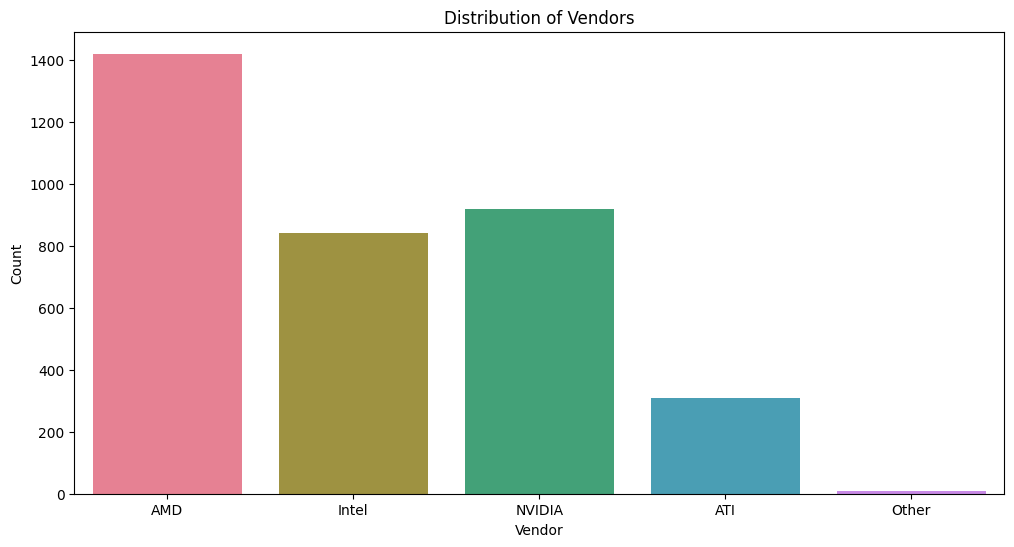

In [6]:
from chip_analysis.exploratory_data_analysis import EDA  # noqa: E402

EDA_part = EDA(df)
type_distribution_sns = EDA_part.vendor_distribution_sns()

Observe the distribution of chips in different vendors by Matplotlib.

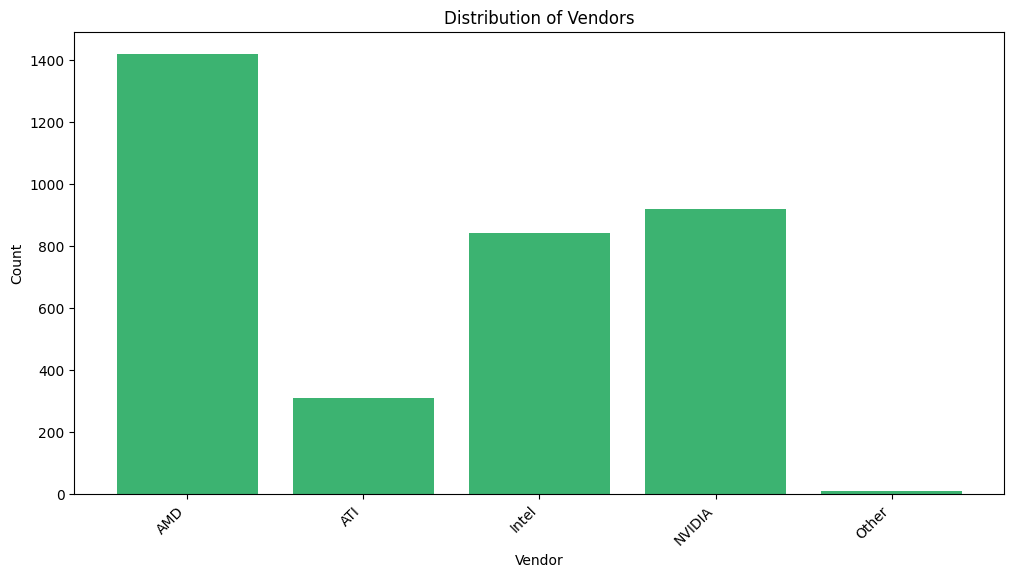

In [7]:
type_distribution_plt = EDA_part.vendor_distribution_plt()

Conclusion: It can be seen from the chart that, although there are many manufacturers involved in chip production, development, and manufacturing, the three that contribute the most are AMD, Intel, and NVIDIA. Their products have at least 800 units, with AMD even exceeding 1,400.Ignoring the distinction between chip types, we can find that AMD manufacturers have the largest number of chip research and development.

Next, let’s take a look at the ratio of CPU and GPU among various manufacturers.

**3.2 Analyze the proportion of CPU and GPU between different manufacturers**

Observe the chips of CPU and GPU in different vendors using Seaborn

<Figure size 1200x600 with 0 Axes>

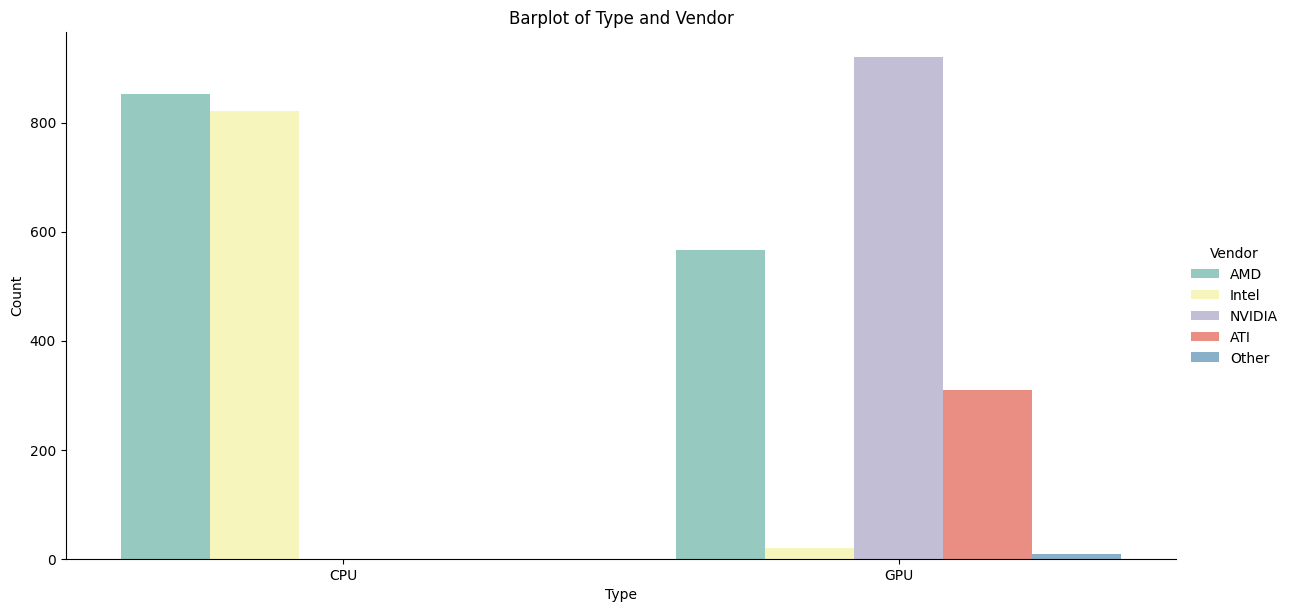

In [8]:
product_vendor_sns = EDA_part.type_vendor_sns()

Observe the chips of CPU and GPU in different vendors by Matplotlib

<Figure size 1200x600 with 0 Axes>

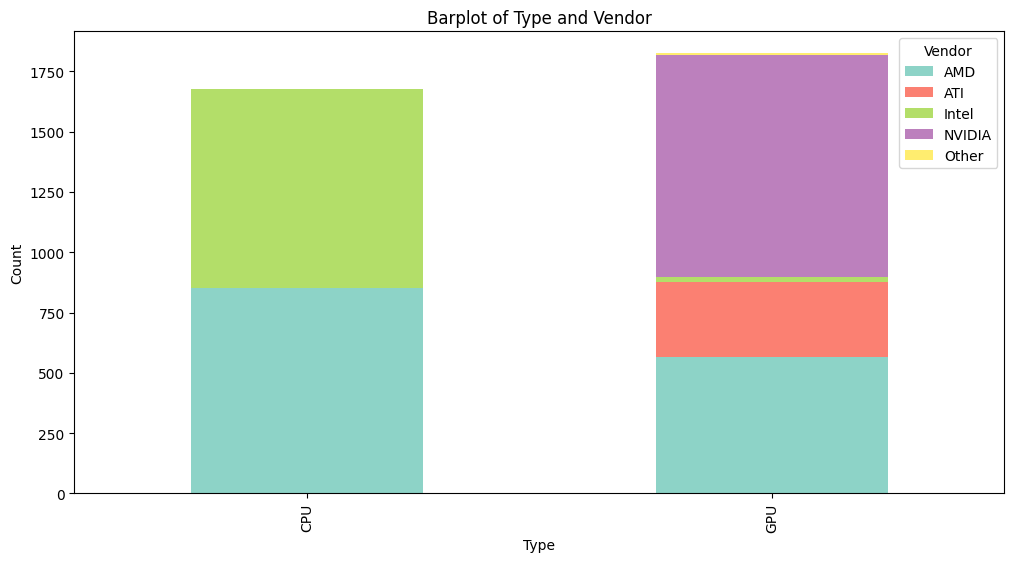

In [9]:
product_vendor_plt = EDA_part.type_vendor_plt()

Conclusion: From the above chart, we can see that the main manufacturers of CPU chips are AMD and Intel, and their chip development numbers are basically the same. The main manufacturers of GPU are NVIDIA and AMD, but NVIDIA's number of chip developments far exceeds that of AMD. From this, we can draw a conclusion: AMD is a comprehensive chip development company. It develops both GPU and CPU. Intel is more proficient in CPU development, and NVIDIA is more focused on GPU development.

After understanding the chip R&D advantages of each manufacturer, we will take a closer look at the overall process size level on the market.

**3.3 Analyze the process size of CPU and GPU between different manufacturers**

 First, let's analyze the process size of chips, including CPU and using Seaborn.

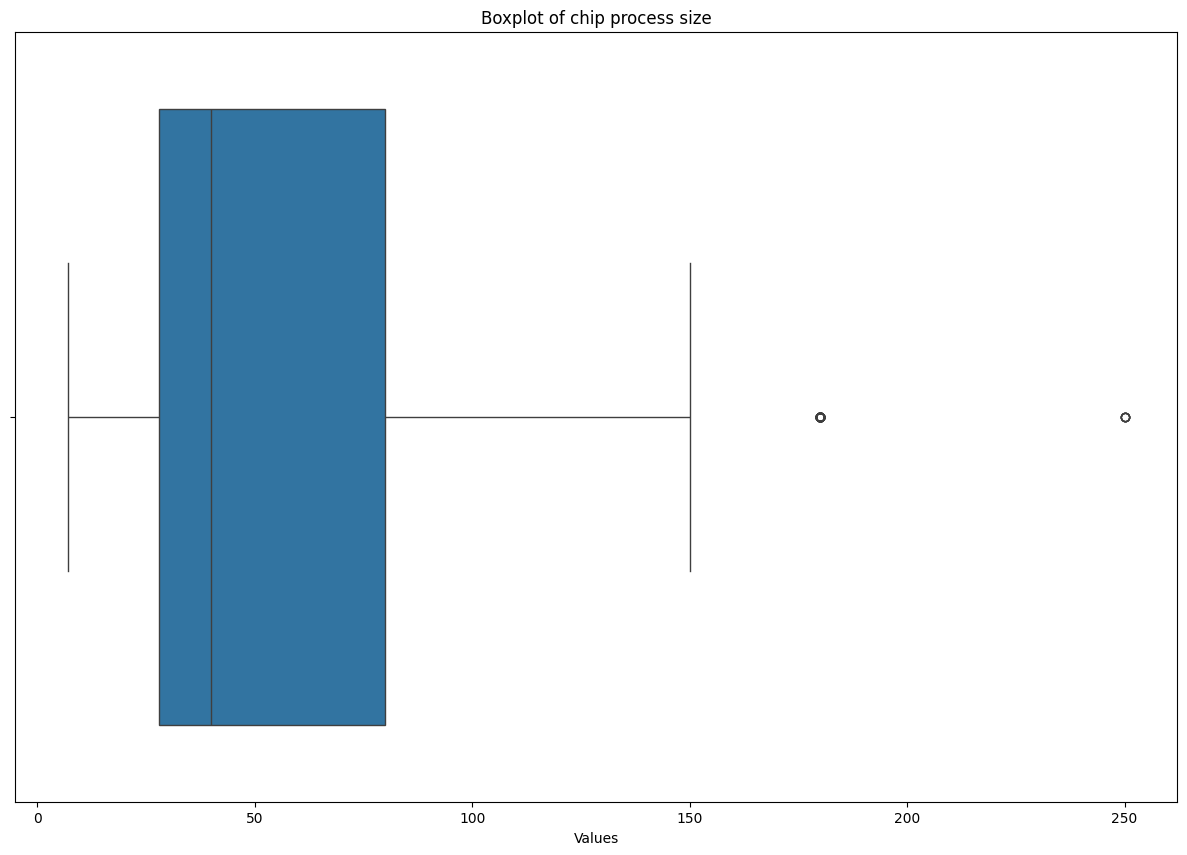

In [10]:
process_size_sns = EDA_part.process_size_sns()

And analyze the process size of chips, including CPU and by Matplotlib.

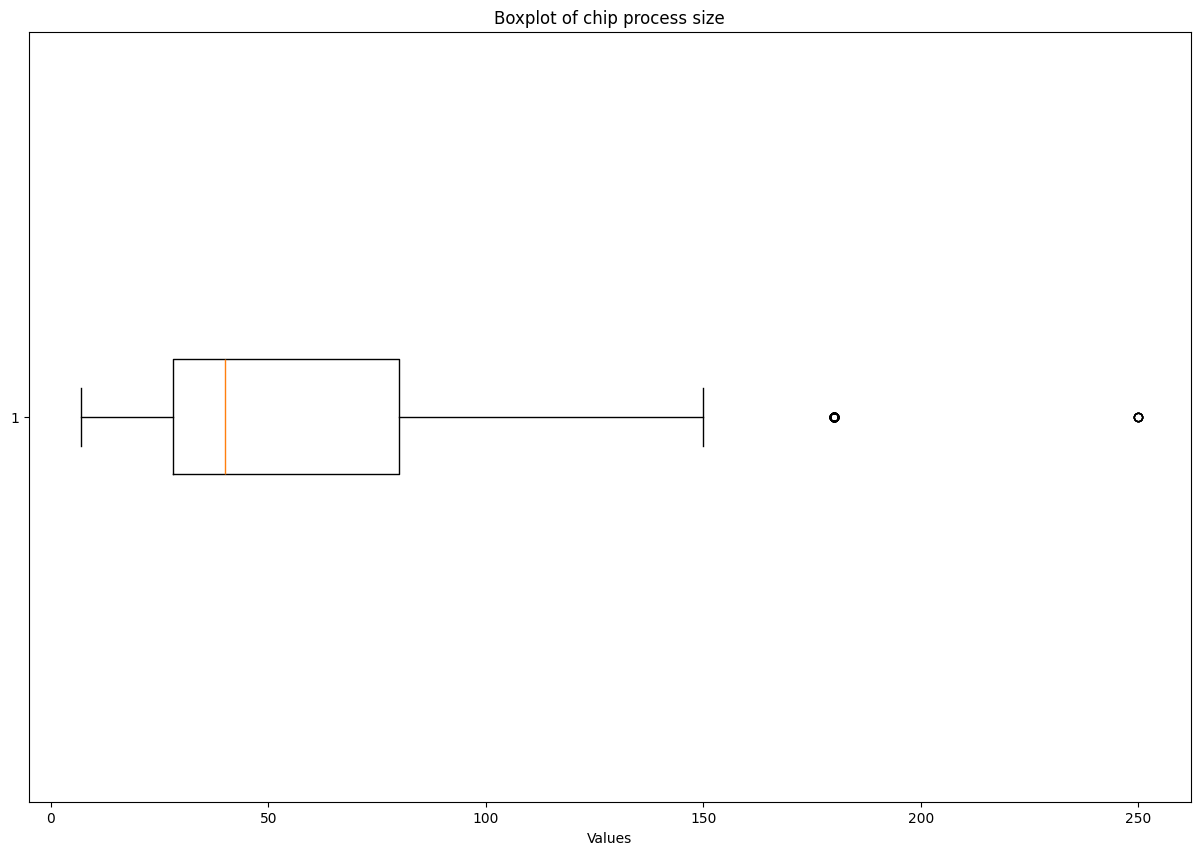

In [11]:
process_size_plt = EDA_part.process_size_plt()

After overviewing the whole market situation, let's observe the process size by different vendors.

First we also observe the process size by different vendors using Seaborn.

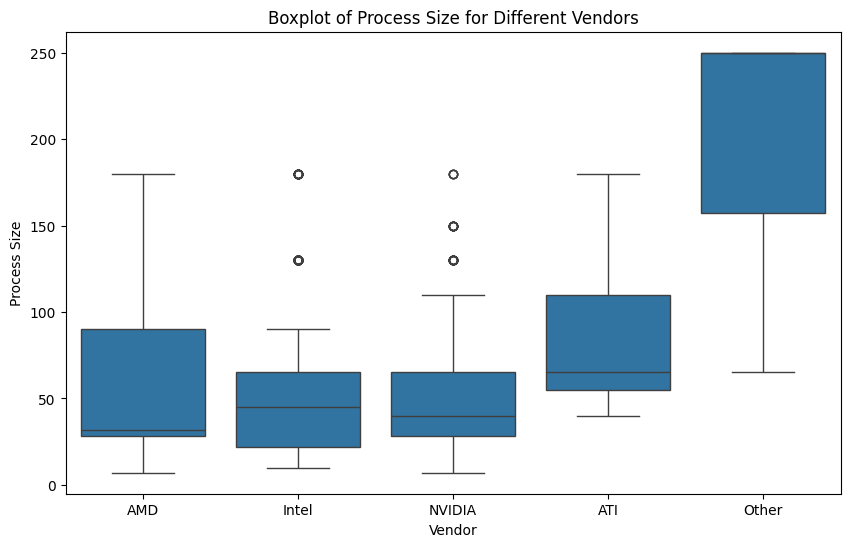

In [12]:
process_size_vendor = EDA_part.process_size_vendor_sns()

And next we observe process size by different vendors using Matplotlib.

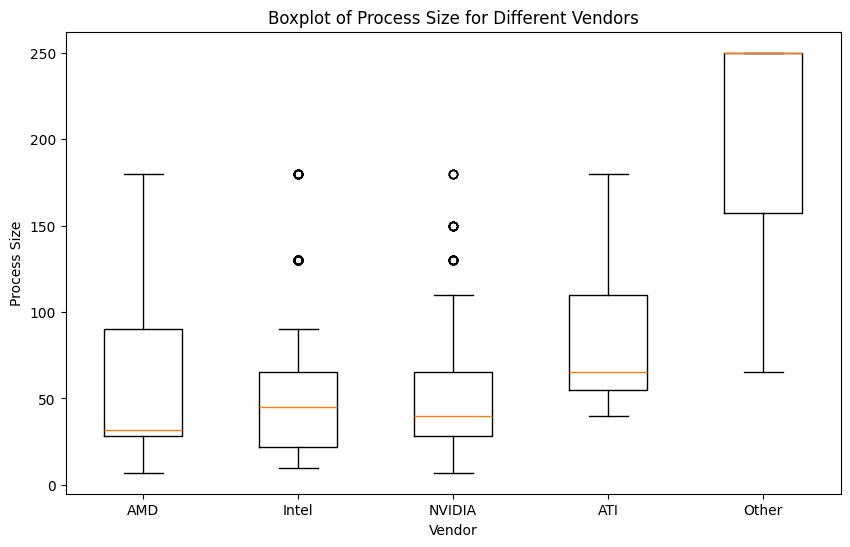

In [13]:
process_size_vendor = EDA_part.process_size_vendor_plt()

Conclusion: The process size governs the physical dimensions of the components constituting a chip. Smaller process nodes can lead to reduced costs and lower power consumption. However, there are tradeoffs in terms of difficulty and possibly power or cost, as the saying goes, 'there's no such thing as a free lunch.' This dataset encompasses various types of chips from different manufacturers. From the chart, it's evident that the commonly used chip process sizes in the market are mainly concentrated in sizes less than 50 nanometers. Although smaller process technology tends to enhance performance, it also comes with higher energy consumption. Additionally, cost issues must be considered. Presently, communication products predominantly utilize 5nm processes, with Samsung even developing the first 2nm chip in 2022.

After this, let's directly move forward to next attribute in different vendors.

**3.4 Analysis and overview of TDP performance of chips from various vendors**

First is still analyzing the TDP performance of chips by Seaborn.

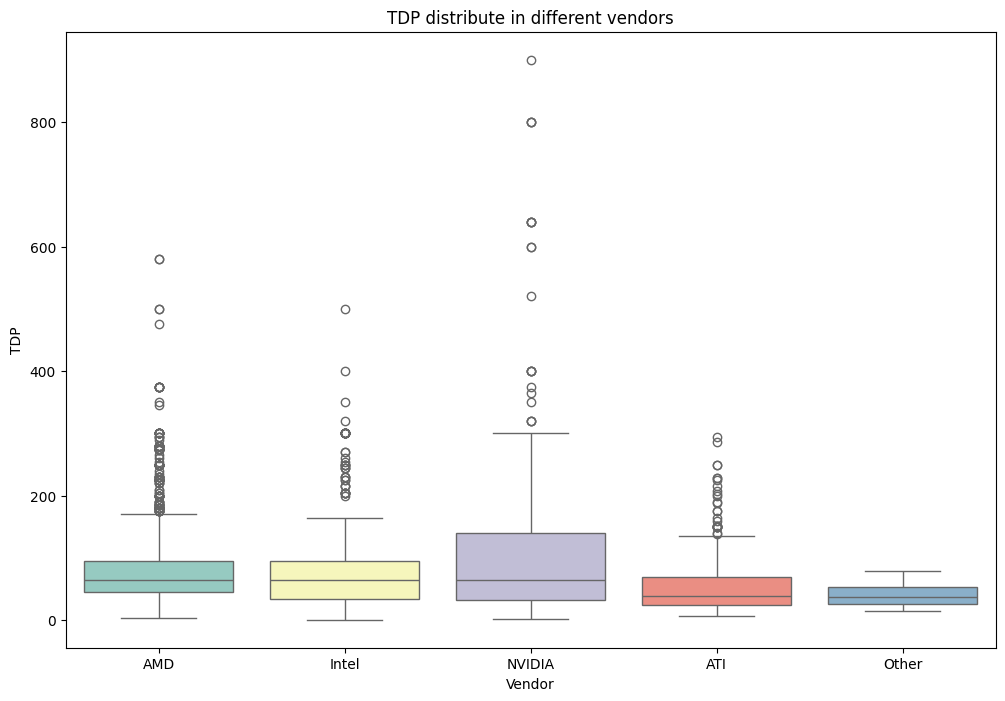

In [14]:
release_date_sns = EDA_part.TDP_distribution_sns()

And analyzing the TDP performance of chips with Matplotlib.

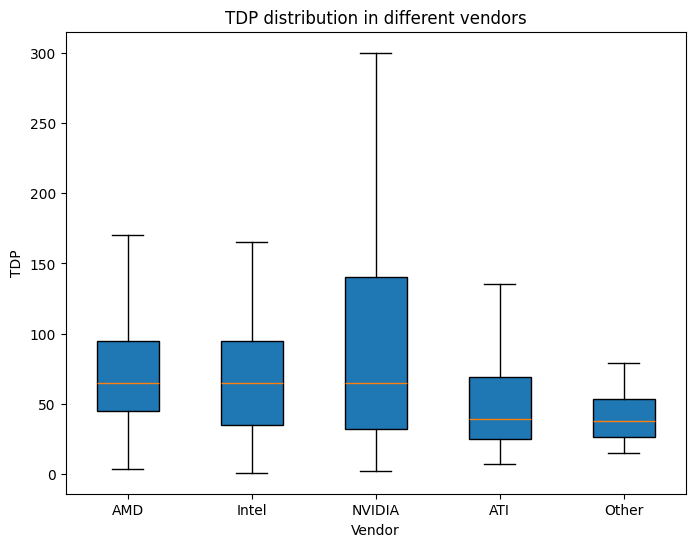

In [15]:
release_date_plt = EDA_part.TDP_distribution_plt()

The thermal design power (TDP), sometimes called the thermal design point, is the maximum amount of heat generated by a computer chip or component (often a CPU, GPU, or system on a chip) that the cooling system in a computer is designed to dissipate under any workload. We can see from the chart that the TDP of AMD, Intel, and NVIDIA, the top three companies in chip development, is basically the same. This also shows that they have the authority to formulate industry standards. Although their TDP is higher than that of ATI and other small companies, the analysis results regarding process size indicate that the processing performance of these three companies is better. This also explains why these three companies outperform others in the industry

So this is the whole EDA part.After we have a brief understanding of the situation and individual indicators of each chip manufacturer, let's analyze the performance of each chip in a deeper way.

<font size="6"> 4. Inference </font>

Before we start. Let's make a initialization first

In [16]:
from chip_analysis_and_prediction.inferences import Inferences  # noqa: E402

inferences_analysis = Inferences(df)

**4.1 Analyze the proportion of CPU and GPU usage between different vendors.**

In this section, we change the form and continue to look at the proportions of CPUs and GPUs corresponding to different vendors.

First we analyze the proportion of CPU and GPU usage among different vendors using Seaborn method.

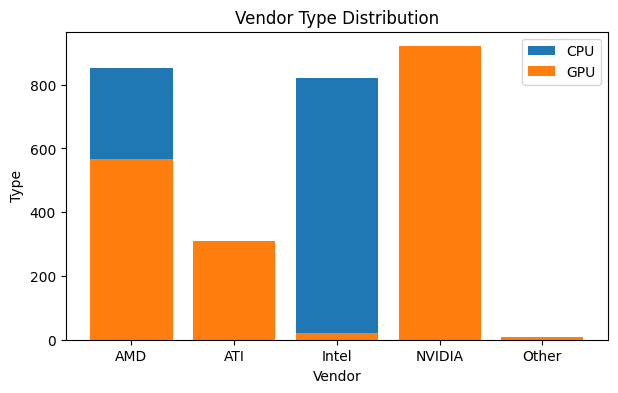

In [17]:
inferences_analysis.vendor_type_plt()

Again, we analyze the proportion of CPU and GPU usage between different vendors using Matplotlib.

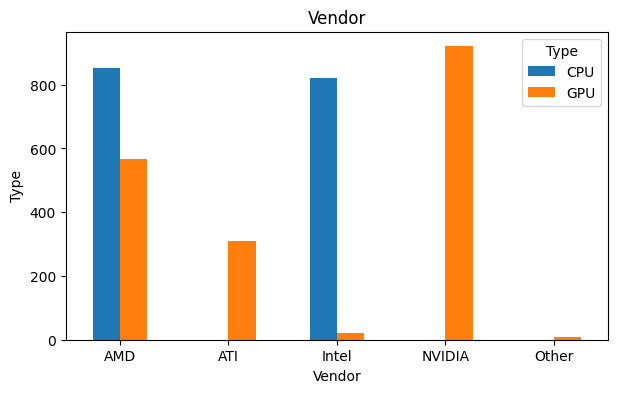

In [18]:
inferences_analysis.vendor_type_sns()

This result can further illustrates the comprehensive strength of AMD and the professionalism of Intel and NVDIA in the fields of CPU and GPU.

Although AMD has the largest number of chip research and development, it does not completely mean that the performance of its chips is the best. Next, let's first take an overview of the comparison of chip performance from various manufacturers.

**4.2 Analyze the attributes of CPU and GPU between different vendors.**

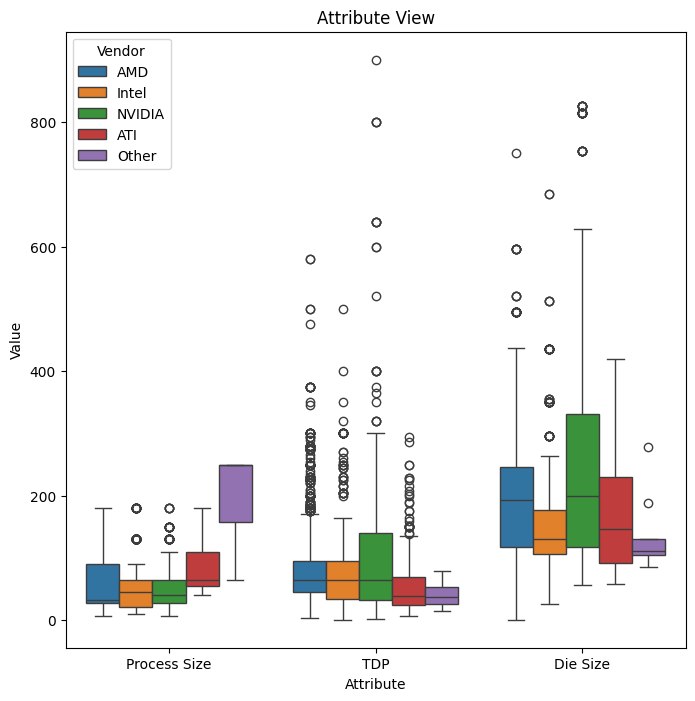

In [19]:
inferences_analysis.chip_attribute()

This part is to first have a rough understanding of the chip performance of each manufacturer to provide us with direction for further analysis.We can draw a preliminary conclusion, that is, the TDP levels are basically the same, which is almost the industry standard. But other indicators are different, we will continue to analyze.

**4.3 Analyze the average frequency of CPU and GPU between different Vendors.**

Because frequency can be used as the most direct representation of chip performance, let’s first look at the average frequency of chips from various manufacturers.

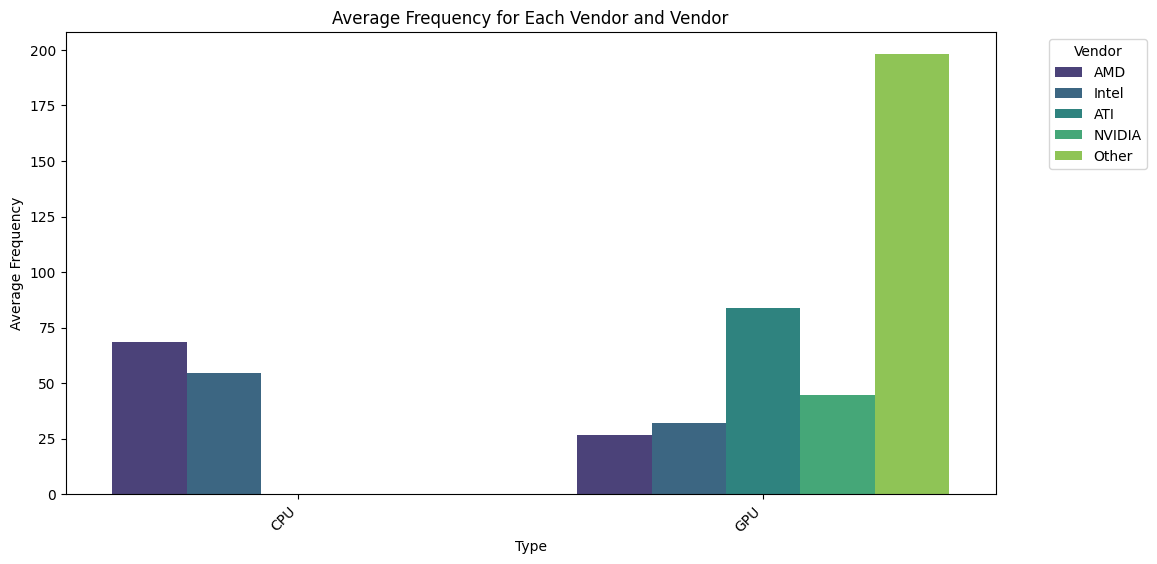

In [20]:
inferences_analysis.ave_freq_type_ven()

Conclusion: The frequency of a microchip refers to the frequency of the radio wave given off by the scanner that activates and reads the chip.There is no one specific frequency band that is the most important band to the Department. However, the preponderance of the frequencies used by the DON is between 30 Hz to 3 GHz. The Extremely Low Frequency (ELF) band and Very Low Frequency (VLF) band support our tactical submarine forces and other DON capabilities, while higher frequencies in the Very High Frequency (VHF), Ultra High Frequency (UHF) and Super High Frequency (SHF) bands support communications and a myriad of other DON capabilities such as unmanned aerial vehicles. Frequencies in the EHF band support critical DON satellite communications that provide immediate, worldwide communications and intelligence capabilities.

So, from the above figure, we can see that there is not much difference in the frequencies of AMD and Intel, the two manufacturers of CPU chips, and the main frequency bands are concentrated between 50 and 70, indicating that the CPUs of the two manufacturers are mainly used for communication. There are obvious differences in the frequency bands of multiple manufacturers in GPU, especially ATI, which may be more used in the military field.

After we use frequency as the basic characterization for analysis, let's take a look at their physical process performance.As we all know, die size is the top priority of various physical properties. It mainly depends on whether the chip can be manufactured. It also shows the process capability of a country's chip production. Therefore, we mainly analyze it in physical properties.

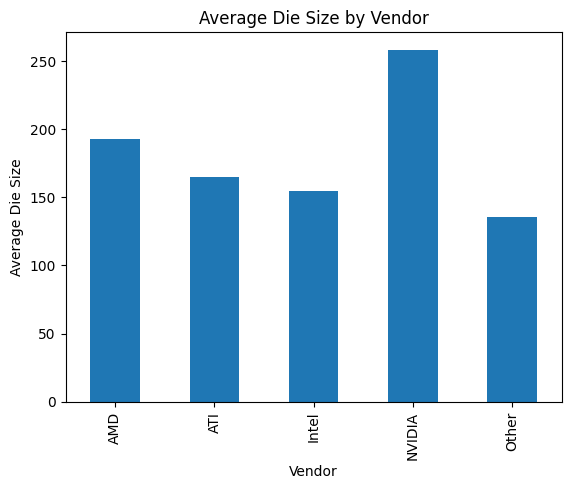

In [ ]:
inferences_analysis.freq_and_TDP()

Conclusion: A smaller die size allows for packing more transistors in a given surface area. This enables manufacturers to yield more chips per wafer, consequently reducing the manufacturing cost per chip and improving overall profitability. Therefore, based on the data presented in the table, it is evident that Intel's die size is the smallest among all manufacturers, resulting in superior performance. While other manufacturers may have smaller die sizes, their representation is not robust, and they exhibit notable shortcomings in terms of both chip development quantity and performance, rendering them less significant in the comparison.

After analyzing the performance and characterization of the current chip, we might as well try to predict the future of the chip. As we just said, frequency is the only attribute that can directly characterize its performance, so we still use frequency for prediction.

**4.5 Development Trends in Chip Performance**

With the gradual development of AI technology, our requirements for chip performance have gradually increased. In the above section, we analyzed the relationship between the various performances of the chip. Although the various performances of the chip are related to each other and may fluctuate, we still want to try to predict the overall development direction of the chip's performance in this section.

<font size="4.5"> 4.5.1 Chip attribute overview </font>


In order to better select the model, first let's take an overall look at the relationship diagram between the various performances of the chip.

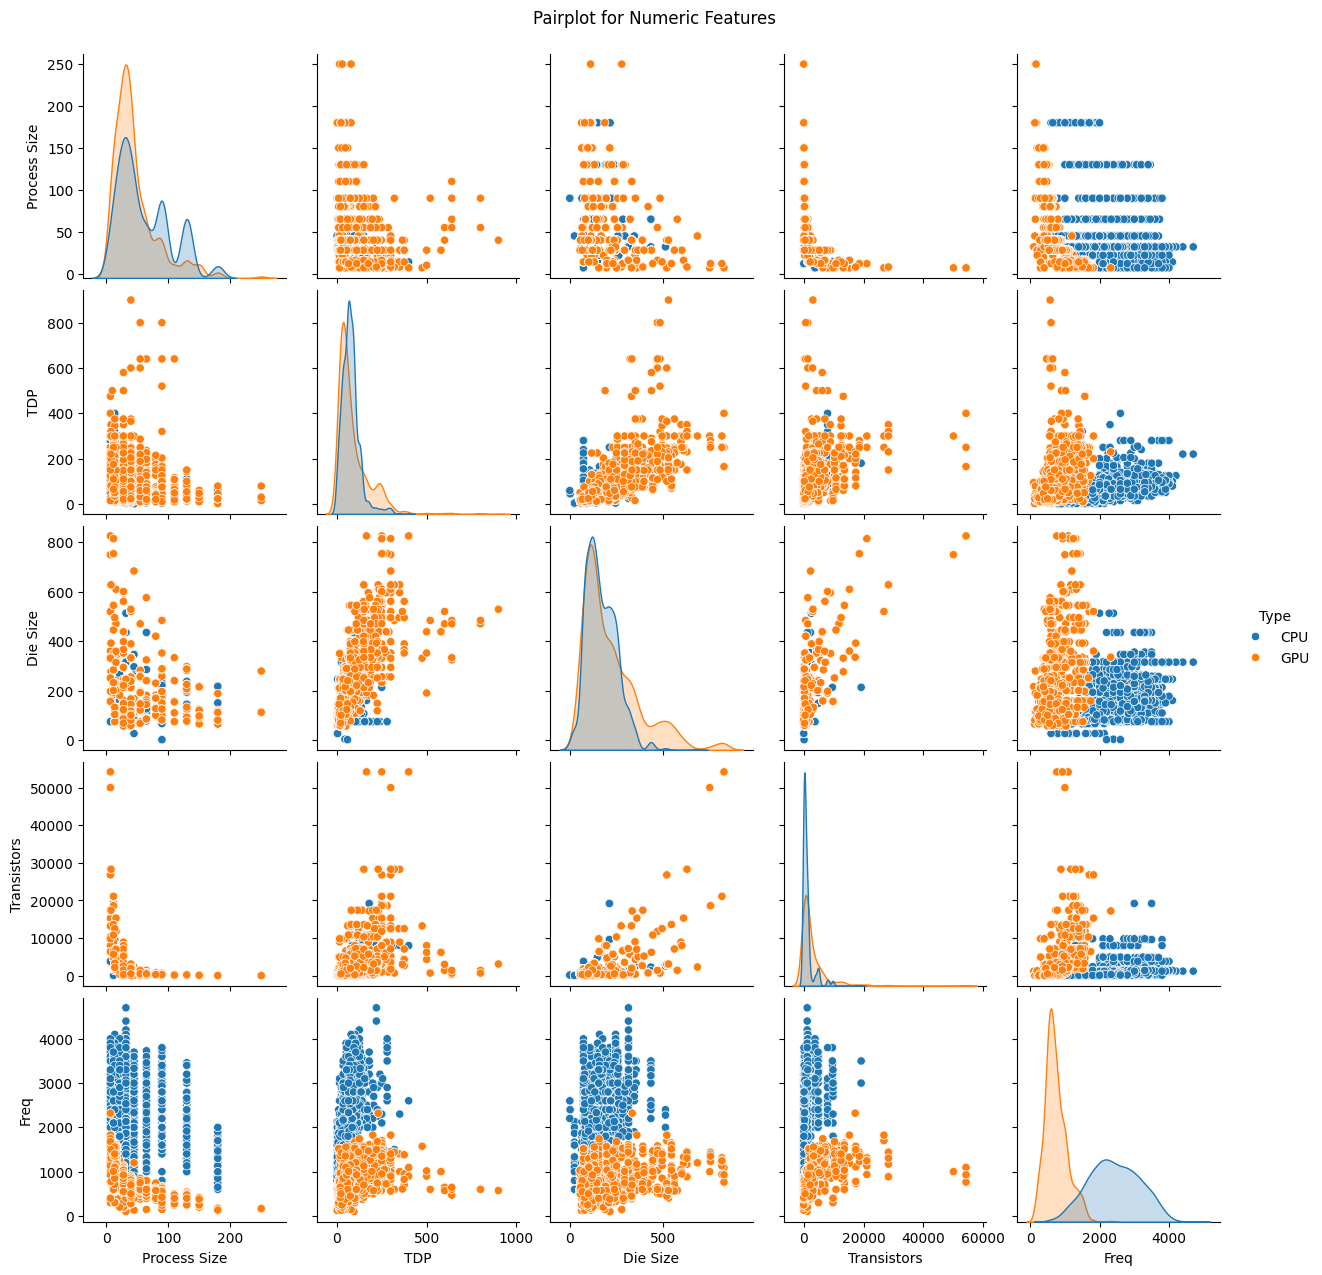

In [ ]:
inferences_analysis.chip_attribute_overview()

<font size="4.5"> 4.5.2 Select data and model </font>

**Data:**

Because the overall performance index of the chip is actually ultimately determined by the Frequency of the chip, we decided to use Frequency as our prediction target. First, let’s use linear regression to roughly take a look at the development trend of the chip’s frequency over time.

                            OLS Regression Results                            
Dep. Variable:                   Freq   R-squared:                      -0.034
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 06 Dec 2023   Prob (F-statistic):                nan
Time:                        18:12:18   Log-Likelihood:                -29215.
No. Observations:                3499   AIC:                         5.843e+04
Df Residuals:                    3498   BIC:                         5.844e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8.985e-34   1.01e-35     88.637   

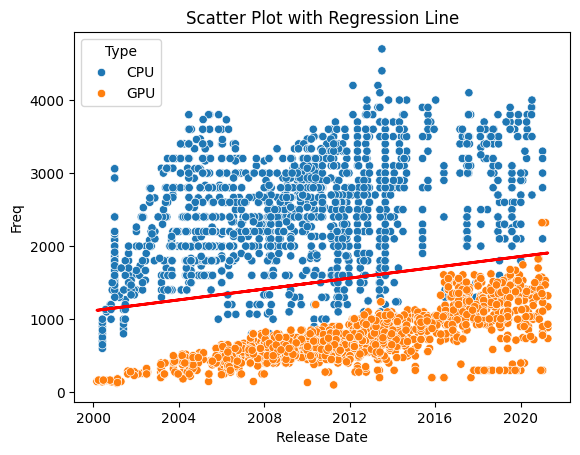

In [ ]:
inferences_analysis.freq_trend()

As can be seen from the above chart, our CPU and GPU generally increase gradually over time. The frequency of the CPU is higher than that of the GPU because people's computing requirements exceed image processing requirements. After reaching this conclusion, let's use the physical performance of the CPU and GPU as indicators to analyze their comprehensive frequency performance.

**Model:** I decide to use RandomForestRegressor and there are several reasons:
<li>Handles Non-Linearity: Random Forest models are capable of capturing non-linear relationships between features and the target variable. This is beneficial when the relationship between "Process Size", "TDP", "Die Size", "Transistors," and "Freq" may not be linear.
<li>Resistant to Overfitting: Random Forests are less prone to overfitting compared to individual decision trees. The ensemble nature of Random Forests, which combines multiple trees, helps improve generalization performance.
<li>Handles Mixed Data Types: The model accommodates both numerical and categorical features, which is suitable for your dataset with a mix of feature types like "Type" and "Release Date."
<li>Cross-Validation Performance: The cross-validation approach in the provided code ensures that the model's performance is assessed across different subsets of the data, providing a more robust estimate of its generalization capabilities.

<font size="4.5"> 4.5.2 Use cross-validation to evaluate model performance  </font>

1.Data Classification

As can be seen from the above trend table, there is a big difference in frequency between CPU and GPU. In order to better train the model, we will predict the frequency of CPU and GPU respectively.

Let's evaluate CPU's model first.

R-squared on Test Set: 0.6734519053805705


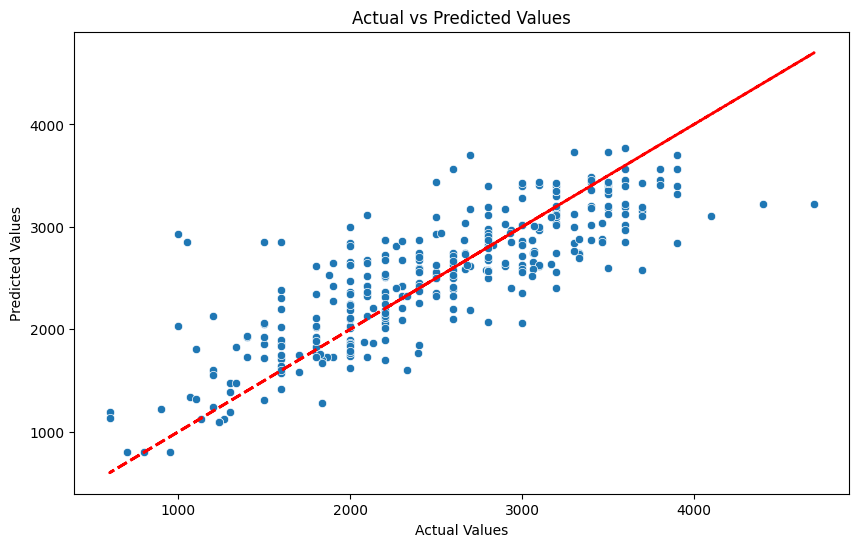

In [ ]:
inferences_analysis.cpu_freq_and_attri()

Next let's evaluate GPU's model.

R-squared on Test Set: 0.8245333992496826


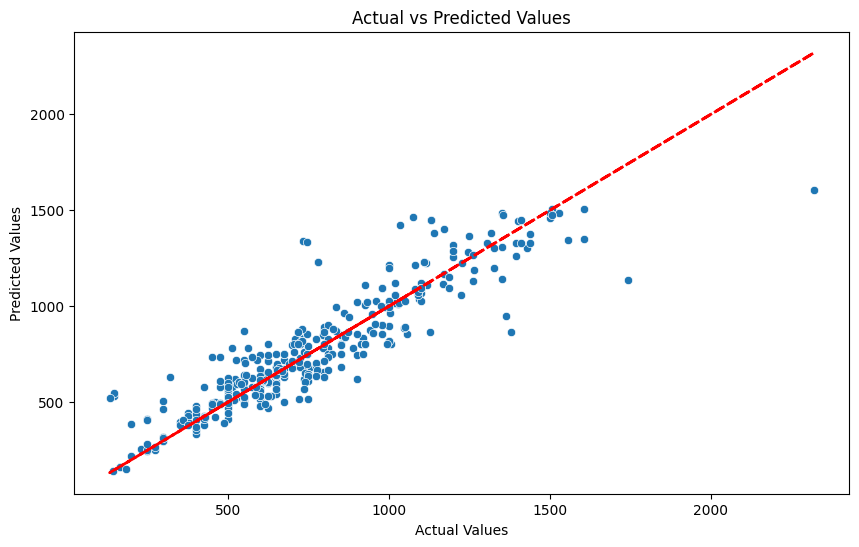

In [ ]:
inferences_analysis.gpu_freq_and_attri()

Interpretation of Results:

Based on the results, the R-squared for the CPU is only 0.67, while the GPU's R-squared is 0.82. The closer R-squared is to 1, the better the performance of the model. We can also draw this conclusion from the chart:
The two graphs above provide a comparison between actual data and predicted data. The red line represents the line where X equals Y. The closer the data points on the scatter plot are to the red line, the higher the accuracy.

**Conclusion:**
We found in the prediction model that Die Size, TDP, Transistor and Process Size all have a certain impact on frequency. But its R-squared is not particularly high, for several reasons:

**1.The data itself:**
<li>The performance of a chip is not simply linear. There are many process bottlenecks and limitations in the real world, resulting in irregular changes.
<li>When other performances of the CPU and GPU in the data remain unchanged, one performance may have multiple results for use in different scenarios, resulting in dense and scattered data.
<li>The relationship between die size, TDP, transistor count, process size, and frequency in computer processors is intricate. A smaller process size allows for more transistors on the chip, enhancing performance and energy efficiency. Larger die sizes provide space for components, impacting overall capabilities. Transistor count directly influences processing power. Higher frequencies result in faster execution of instructions but may increase heat generation. TDP reflects the maximum power a cooling system must dissipate. Advancements aim to balance these factors, optimizing performance, energy efficiency, and functionality in modern processors.
<li>There might be a potential non-linear relationships that not considered.

**2.The model**
<li>Multicollinearity:
High correlation between independent variables (multicollinearity) can lead to instability in coefficient estimates and affect the model's performance. Check for multicollinearity and consider removing or transforming correlated features.
<li>While overfitting is often associated with high R-squared on the training data, it can still lead to poor generalization on new data. 

<font size="6"> 5. Conclusion </font>

The purpose of this research was to inform about the different types of chip by different vendors and attributes.From this research it can be stated that.To sum up, we can see that different manufacturers have different advantages and disadvantages in terms of CPU and GPU. After considering the number of chip development, die size, process size, TDP and frequency, if the computing performance requirements are higher, , both Intel and AMD can be considered, and AMD's GPU performance is also considered the industry leader. If the image processing requirements are relatively high, you can choose a device configured with NVDIA's GPU to meet high-performance requirements.Generally speaking, the smaller the size of the chip processing technology, the smaller the number of transistors, the smaller the chip die, and the faster the chip frequency. We can summarize our future research directions for chips.Although the performance of our prediction model is not particularly high, there are still very pleasing conclusions. What we can be sure of is that the performance of the chip is developing rapidly, especially in the AI industry. With the technology of deep learning, the development of GPU has There is a tendency to gradually exceed the CPU.

<font size="6"> 6. References </font>

[Pandas lib references](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

[Seaborn lib references](https://seaborn.pydata.org/index.html)

[sklearn.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

[sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor)

[sklearn.metrics.r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

[Chip technology](https://www.asml.com/en/technology/all-about-microchips/microchip-basics)

[Chip's process size](https://www.10stripe.com/articles/what-does-process-size-mean.php)

[Chip's TDP](https://en.wikipedia.org/wiki/Thermal_design_power)

[Chip's Frequency](https://www.doncio.navy.mil/CHIPS/ArticleDetails.aspx?ID=3047)

[Chip's Die Size](https://www.quora.com/What-is-this-die-size-in-CPUs-What-difference-does-it-make)